<a href="https://colab.research.google.com/github/EstherNjuguna/ddi/blob/main/Dalberg_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Health facilities Dataset In Nairobi Kenya

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx


## Explanation of acronymns in the dataset

ANC: Antenatal Care - Care provided to pregnant women before childbirth.

ART: Antiretroviral Therapy - Medication used to treat HIV/AIDS.

BEOC: Basic Emergency Obstetric Care - Essential obstetric services provided to manage complications during childbirth.

BLOOD: Blood tests or blood-related parameters.

CAES SEC: Caesarean Section - A surgical procedure for delivering a baby.

CEOC: Comprehensive Emergency Obstetric Care - Advanced obstetric services for managing severe complications during childbirth.

C-IMCI: Community Integrated Management of Childhood Illness - A strategy for managing common childhood illnesses at the community level.

EPI: Expanded Program on Immunization - A program aimed at providing vaccines to prevent infectious diseases.

FP: Family Planning - Services and methods to help individuals plan and space their pregnancies.

GROWM: Growth Monitoring - Assessing the physical growth of children over time.

HBC:Home-Based Care - Medical care provided at home, often for patients who are unable to visit healthcare facilities.

HCT: HIV Counseling and Testing - Services for counseling individuals about HIV/AIDS and conducting tests for HIV.

IPD: Inpatient Department - Hospital department where patients are admitted for treatment and care.

OPD: Outpatient Department - Hospital department where patients receive treatment without being admitted to the hospital.

OUTREACH: Medical services provided outside of healthcare facilities, often in communities or remote areas.

PMTCT: Prevention of Mother-to-Child Transmission - Measures to prevent the transmission of HIV from mother to child during childbirth or breastfeeding.

RAD/XRAY: Radiology/X-ray - Imaging techniques used for diagnosis and treatment monitoring.

RHTC/RHDC: Reproductive Health and Treatment Centers/Reproductive Health and Diagnostic Centers - Facilities providing reproductive health services.

TB DIAG: Tuberculosis Diagnosis - Procedures and tests for diagnosing tuberculosis.

TB LABS: Tuberculosis Laboratories - Laboratories specialized in diagnosing and monitoring tuberculosis.

TB TREAT: Tuberculosis Treatment - Medication and care for patients diagnosed with tuberculosis.

YOUTH: Healthcare services targeting youth, often addressing issues specific to adolescents and young adults.

In [ ]:
# load data
df = pd.read_excel("ehealth-kenya-facilities-download-21102015.xls")
df.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(10505, 50)

The data has 10505 rows and 50 columns

In [ ]:
df.describe()

,Facility Code,Beds,Cots,Official Alternate No,ANC,BEOC,BLOOD,CAES SEC,CEOC,EPI,...,HCT,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
count,10505.000000,10418.000000,10428.000000,9.520000e+02,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,15726.711471,5.432905,0.744342,6.695277e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3246.324955,29.862656,11.332022,5.568178e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10001.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,12957.000000,0.000000,0.000000,7.138962e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,15702.000000,0.000000,0.000000,7.227692e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,18569.000000,1.000000,0.000000,7.278981e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,21281.000000,1455.000000,1000.000000,7.382217e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            10505 non-null  int64  
 1   Facility Name            10505 non-null  object 
 2   Province                 10505 non-null  object 
 3   County                   10505 non-null  object 
 4   District                 10505 non-null  object 
 5   Division                 10238 non-null  object 
 6   Type                     10505 non-null  object 
 7   Owner                    10505 non-null  object 
 8   Location                 10010 non-null  object 
 9   Sub Location             9613 non-null   object 
 10  Description of Location  5304 non-null   object 
 11  Constituency             10505 non-null  object 
 12  Nearest Town             9903 non-null   object 
 13  Beds                     10418 non-null  float64
 14  Cots                  

In [ ]:
df.isnull().sum()/len(df)*100


Facility Code                0.000000
Facility Name                0.000000
Province                     0.000000
County                       0.000000
District                     0.000000
Division                     2.541647
Type                         0.000000
Owner                        0.000000
Location                     4.712042
Sub Location                 8.491195
Description of Location     49.509757
Constituency                 0.000000
Nearest Town                 5.730604
Beds                         0.828177
Cots                         0.732984
Official Landline           86.987149
Official Fax                94.859591
Official Mobile             72.251309
Official Email              82.322703
Official Address            32.917658
Official Alternate No       90.937649
Town                        25.387911
Post Code                   36.411233
In Charge                   20.371252
Job Title of in Charge      29.500238
Open 24 Hours                4.255117
Open Weekend

In [ ]:
df.columns

Index(['Facility Code', 'Facility Name', 'Province', 'County', 'District',
       'Division', 'Type', 'Owner', 'Location', 'Sub Location',
       'Description of Location', 'Constituency', 'Nearest Town', 'Beds',
       'Cots', 'Official Landline', 'Official Fax', 'Official Mobile',
       'Official Email', 'Official Address', 'Official Alternate No', 'Town',
       'Post Code', 'In Charge', 'Job Title of in Charge', 'Open 24 Hours',
       'Open Weekends', 'Operational Status', 'ANC', 'ART', 'BEOC', 'BLOOD',
       'CAES SEC', 'CEOC', 'C-IMCI', 'EPI', 'FP', 'GROWM', 'HBC', 'HCT', 'IPD',
       'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG',
       'TB LABS', 'TB TREAT', 'YOUTH'],
      dtype='object')

## Missing Values
Columns that had no data were dropped. This included: ANC, BEOC, Blood, CAES SEC, CEOC, EPI, GROWM, HCT, OPD, OUTREACH, PMTCT, RAD, RHTC,TB DIAG, TB LABS, TB TREAT, youth.
Other columns such as official landline, official fax, official mobilee, official email, official address, official alternate no were also dropped.

In [ ]:
df.drop(columns=['GROWM',  'HCT','ANC', 'BEOC', 'BLOOD',
       'CAES SEC', 'CEOC',
       'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG',
       'TB LABS', 'TB TREAT', 'YOUTH','Official Landline', 'Official Fax' ,'EPI', 'Official Mobile', 'Official Email', 'Official Alternate No',  'Official Address', ]
, inplace=True)

In [ ]:
df.isnull().mean()*100

Facility Code               0.000000
Facility Name               0.000000
Province                    0.000000
County                      0.000000
District                    0.000000
Division                    2.541647
Type                        0.000000
Owner                       0.000000
Location                    4.712042
Sub Location                8.491195
Description of Location    49.509757
Constituency                0.000000
Nearest Town                5.730604
Beds                        0.828177
Cots                        0.732984
Town                       25.387911
Post Code                  36.411233
In Charge                  20.371252
Job Title of in Charge     29.500238
Open 24 Hours               4.255117
Open Weekends               4.350309
Operational Status          0.000000
ART                        91.232746
C-IMCI                     88.795812
FP                         59.181342
HBC                        73.365064
IPD                        62.465493
d

In [ ]:
df.describe()

,Facility Code,Beds,Cots
count,10505.000000,10418.000000,10428.000000
mean,15726.711471,5.432905,0.744342
std,3246.324955,29.862656,11.332022
min,10001.000000,0.000000,0.000000
25%,12957.000000,0.000000,0.000000
50%,15702.000000,0.000000,0.000000
75%,18569.000000,1.000000,0.000000
max,21281.000000,1455.000000,1000.000000


In [ ]:
df.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,In Charge,Job Title of in Charge,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,Catherine Njoki Mugo,Nursing Officer in Charge,NaN,NaN,Operational,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,Caroline Achieng,Clinical Officer,N,Y,Operational,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,Cpt Kiplagat,Medical Superintendant,N,N,Operational,Y,NaN,Y,Y,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,NaN,NaN,N,N,Operational,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,Jeffrey Mikombi Akide,Clinical Officer,Y,Y,Operational,NaN,NaN,NaN,NaN,NaN


## Nairobi County

In [ ]:
df_nairobi = df[df['County'] == 'Nairobi']
df_nairobi.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,In Charge,Job Title of in Charge,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,Caroline Achieng,Clinical Officer,N,Y,Operational,NaN,NaN,NaN,NaN,NaN
7,13043,7Kr Mrs Health Centre,Nairobi,Nairobi,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,...,Captain Murunga,Nursing Officer in Charge,Y,Y,Operational,NaN,Y,Y,Y,Y
10,20346,AAR Adams Health Centre,Nairobi,Nairobi,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,Woodly,...,Dr Mbuthia Wacera,Medical Superintendant,N,Y,Operational,NaN,NaN,NaN,NaN,NaN
11,12861,AAR City Centre Clinic,Nairobi,Nairobi,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,NaN,...,Dr. Alma Okudo,Doctor In Charge,N,Y,Operational,NaN,NaN,Y,NaN,Y
12,16796,AAR Clinic Sarit Centre (Westlands),Nairobi,Nairobi,Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,Upper Parklands,...,NaN,Nursing Officer in Charge,N,N,Operational,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create a copy of the DataFrame
df_Nairobi = df_nairobi.copy()

# Drop columns from the copy
df_Nairobi.drop(columns=['Province', 'County', 'In Charge'], inplace=True)


In [ ]:
df_Nairobi.head()

,Facility Code,Facility Name,District,Division,Type,Owner,Location,Sub Location,Description of Location,Constituency,...,Post Code,Job Title of in Charge,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD
1,19310,St Jude's Huruma Community Health Services,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,Situated near Ndururumo Primary School (Juja R...,MATHARE,...,NaN,Clinical Officer,N,Y,Operational,NaN,NaN,NaN,NaN,NaN
7,13043,7Kr Mrs Health Centre,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,"Next to Nairobi Opharnage,Off Lang'ata rd.",LANG'ATA,...,00100,Nursing Officer in Charge,Y,Y,Operational,NaN,Y,Y,Y,Y
10,20346,AAR Adams Health Centre,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,Woodly,Greenhouse Adams 1st Floor,KIBRA,...,00100,Medical Superintendant,N,Y,Operational,NaN,NaN,NaN,NaN,NaN
11,12861,AAR City Centre Clinic,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,NaN,Stiuated at ICEA Building along Kenyatta Avenu...,STAREHE,...,00100,Doctor In Charge,N,Y,Operational,NaN,NaN,Y,NaN,Y
12,16796,AAR Clinic Sarit Centre (Westlands),Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,Upper Parklands,In Sarit Centre westlands,WESTLANDS,...,NaN,Nursing Officer in Charge,N,N,Operational,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_Nairobi.shape

(942, 24)

In [ ]:

df_Nairobi = df_Nairobi.apply(lambda x: x.str.title() if x.dtype == "object" else x)

# Display the updated DataFrame
df_Nairobi.head()


,Facility Code,Facility Name,District,Division,Type,Owner,Location,Sub Location,Description of Location,Constituency,...,Post Code,Job Title of in Charge,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD
1,19310,St Jude'S Huruma Community Health Services,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,Situated Near Ndururumo Primary School (Juja R...,Mathare,...,NaN,Clinical Officer,N,Y,Operational,NaN,NaN,NaN,NaN,NaN
7,13043,7Kr Mrs Health Centre,Langata,Lang'Ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,"Next To Nairobi Opharnage,Off Lang'Ata Rd.",Lang'Ata,...,00100,Nursing Officer In Charge,Y,Y,Operational,NaN,Y,Y,Y,Y
10,20346,Aar Adams Health Centre,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,Woodly,Greenhouse Adams 1St Floor,Kibra,...,00100,Medical Superintendant,N,Y,Operational,NaN,NaN,NaN,NaN,NaN
11,12861,Aar City Centre Clinic,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,NaN,Stiuated At Icea Building Along Kenyatta Avenu...,Starehe,...,00100,Doctor In Charge,N,Y,Operational,NaN,NaN,Y,NaN,Y
12,16796,Aar Clinic Sarit Centre (Westlands),Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,Upper Parklands,In Sarit Centre Westlands,Westlands,...,NaN,Nursing Officer In Charge,N,N,Operational,NaN,NaN,NaN,NaN,NaN


In [ ]:
# unique
df_Nairobi.nunique()

Facility Code              942
Facility Name              941
District                    17
Division                    79
Type                        20
Owner                       21
Location                   136
Sub Location               193
Description of Location    617
Constituency                17
Nearest Town               340
Beds                        50
Cots                        15
Town                        25
Post Code                   50
Job Title of in Charge       5
Open 24 Hours                2
Open Weekends                2
Operational Status           3
ART                          1
C-IMCI                       1
FP                           1
HBC                          1
IPD                          1
dtype: int64

In [ ]:
df_Nairobi.duplicated().sum()

0

In [ ]:
non_numeric_cols = df_Nairobi.select_dtypes(exclude=['number']).columns

# Show value counts for each non-numeric column
for col in non_numeric_cols:
    print(f"Value counts for column '{col}':")
    print(df_Nairobi[col].value_counts())
    print()

Value counts for column 'Facility Name':
Facility Name
St Mary'S Medical Clinic                       2
 St Jude'S Huruma Community Health Services    1
New Life Home Childrens Home (Kilimani)        1
Nairobi West Men'S Prison Dispensary           1
Nairobi Women Hospital Eastleigh               1
                                              ..
Jellin Medical Clinic                          1
Jerapha Maternity                              1
Jericho Health Centre                          1
Jerusalem Clinic                               1
Zinduka Clinic                                 1
Name: count, Length: 941, dtype: int64

Value counts for column 'District':
District
Starehe             136
Kibra                93
Roysambu             83
Dagoretti North      76
Westlands            72
Langata              61
Kamukunji            59
Kasarani             58
Makadara             55
Embakasi Central     44
Embakasi West        40
Ruaraka              40
Dagoretti South      29
Embakasi 

## Exploratory Data Analysis

### Facility Types
Majority of the facilities in Nairobi are Medical Clinics, Dispensaries and Helath Centers accounting for 79.3%.
From the data we have 2 National Referral Hospitals.

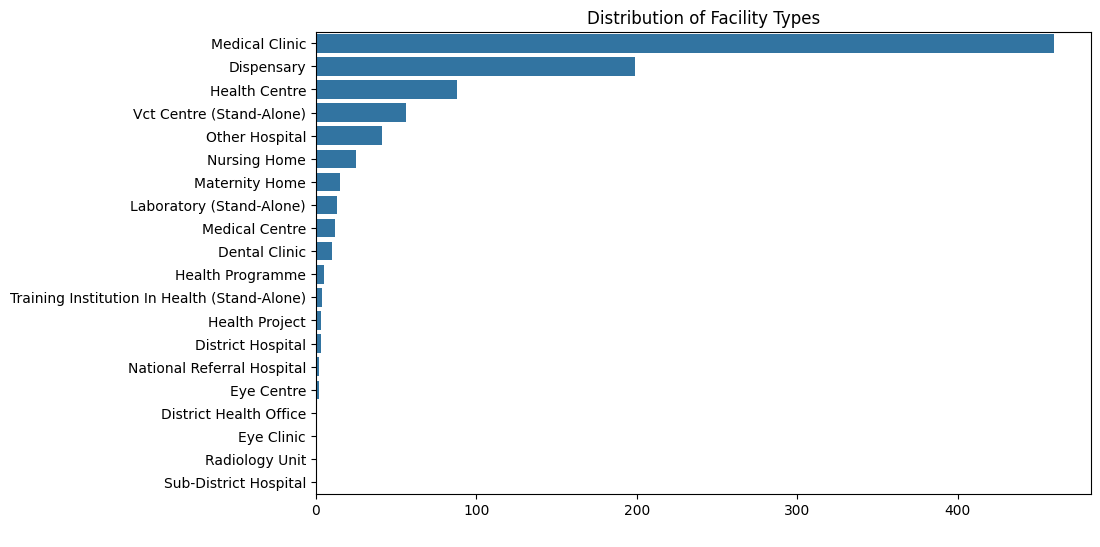

In [ ]:
# Count the occurrences of each facility type
facility_counts = df_Nairobi['Type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=facility_counts.index, x=facility_counts.values)
plt.title('Distribution of Facility Types')
plt.xlabel(' ')
plt.ylabel('')
plt.xticks()
plt.show()


### Facility InCharge

31.2% of the facilities have Nurses as the Incharge.

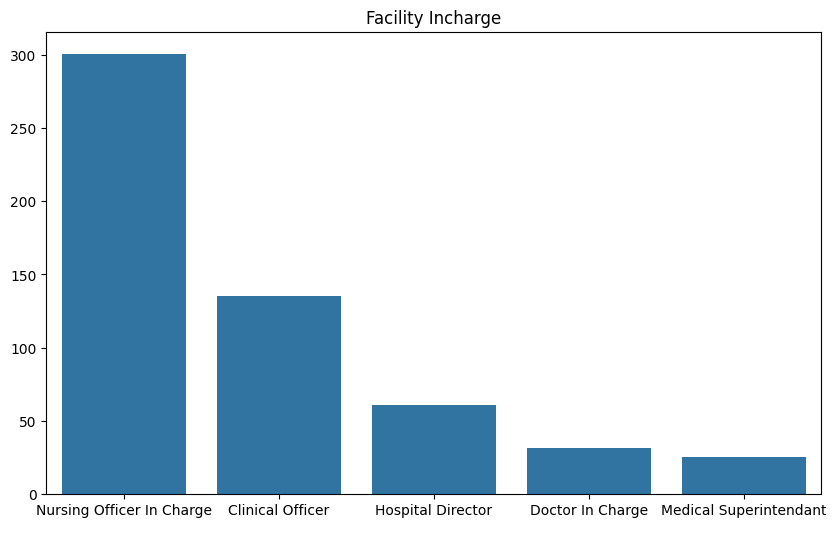

In [ ]:
incharge = df_Nairobi['Job Title of in Charge'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=incharge.index, y=incharge.values)
plt.title('Facility Incharge')
plt.xlabel(' ')
plt.ylabel('')
plt.xticks()
plt.show()

### Operation Status

917 facilities are operational while 6 were pending opening and 19 were non operational

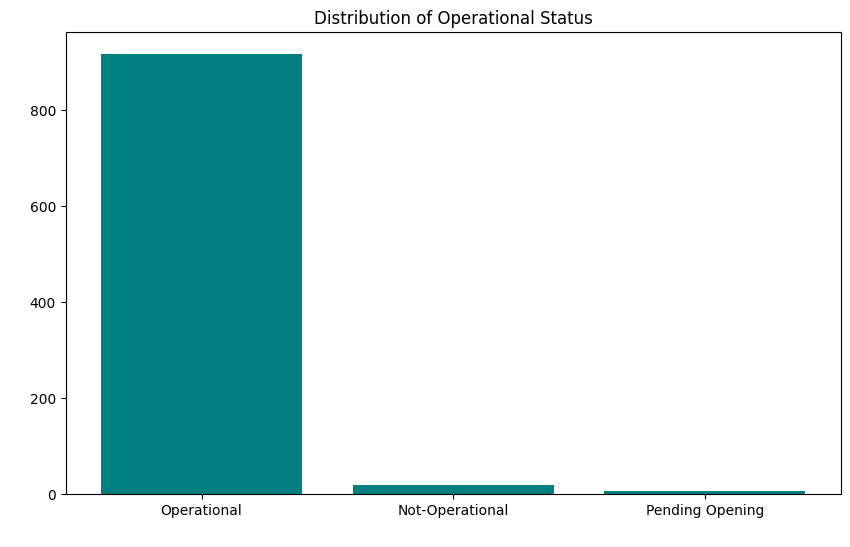

In [ ]:
operation_status = df_Nairobi['Operational Status'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(operation_status.index, operation_status.values, color='teal')
plt.title('Distribution of Operational Status')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks()
plt.show()

### Distribution by constituency

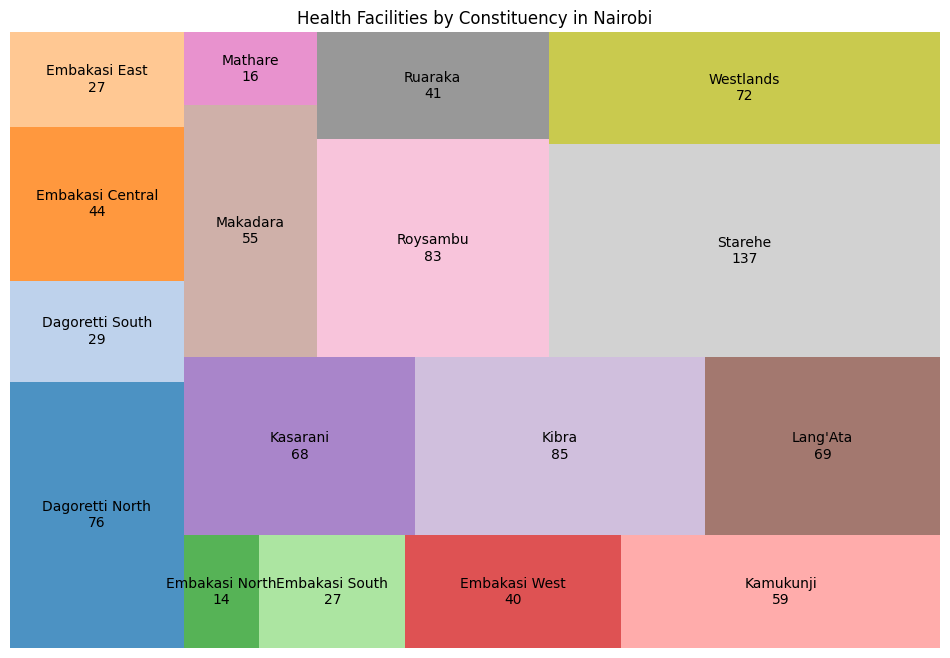

In [ ]:
import squarify
facility_counts_by_constituency = df_Nairobi.groupby('Constituency').size().reset_index(name='Facility Count')

# Prepare data for the treemap
sizes = facility_counts_by_constituency['Facility Count']
labels = facility_counts_by_constituency['Constituency'] + "\n" + facility_counts_by_constituency['Facility Count'].astype(str)

# Draw the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=.8, color=plt.cm.tab20.colors)
plt.title("Health Facilities by Constituency in Nairobi")
plt.axis('off')
plt.show()

In [ ]:
# facilities per constituency
facility_counts_by_constituency.sort_values(by= 'Facility Count',ascending=False)



,Constituency,Facility Count
15,Starehe,137
9,Kibra,85
13,Roysambu,83
0,Dagoretti North,76
16,Westlands,72
10,Lang'Ata,69
8,Kasarani,68
7,Kamukunji,59
11,Makadara,55
2,Embakasi Central,44


In [ ]:
df_Nairobi['Operational Status'].value_counts()

Operational Status
Operational        917
Not-Operational     19
Pending Opening      6
Name: count, dtype: int64

In [ ]:
facility_counts_by_status = df_Nairobi.groupby(['Constituency', 'Operational Status']).size().reset_index(name='Facility Count')

# Filter the DataFrame to show only operational facilities
nonoperational_facilities = facility_counts_by_status[facility_counts_by_status['Operational Status'] == 'Not-Operational']

# Display the results
nonoperational_facilities.sort_values(by= 'Facility Count',ascending=False)


,Constituency,Operational Status,Facility Count
23,Roysambu,Not-Operational,4
25,Ruaraka,Not-Operational,3
2,Embakasi Central,Not-Operational,2
5,Embakasi North,Not-Operational,2
9,Embakasi West,Not-Operational,2
19,Makadara,Not-Operational,2
7,Embakasi South,Not-Operational,1
12,Kasarani,Not-Operational,1
14,Kibra,Not-Operational,1
17,Lang'Ata,Not-Operational,1


### Distribution by sublocation

In [ ]:
facility_counts_by_sublocation = df_Nairobi.groupby('Sub Location').size().reset_index(name='Facility Count')
facility_counts_by_sublocation.sort_values(by= 'Facility Count',ascending=False)

,Sub Location,Facility Count
10,Central,61
68,Kasarani,20
38,Githurai,18
28,Embakasi,17
110,Makina,15
...,...,...
105,Lunga Lunga,1
104,Lumumba/Jericho,1
102,Lower Parklands,1
101,Loresho,1


### Creating Sub counties

We now compare the distribution of facilities and the population density. Brought in another dataset for Population from the KNBS

In [ ]:
df_population = pd.read_csv("kenya-populationland-area-population-density_by_subcounty.csv", skiprows=6)
df_population.head()

,National/ County,Population,Land Area (Sq. Km),Population Density (No. per Sq. Km)
0,Kenya,47564296,580876.3,82
1,Mombasa,1208333,219.9,5495
2,Changamwe,131882,17.7,7457
3,Jomvu,163415,36.9,4432
4,Kisauni,291930,87.7,3328


In [ ]:
#rename our column of interest
df_population.rename(columns={'National/ County': 'County'}, inplace=True)
df_population.rename(columns={'Population Density (No. per Sq. Km)': 'pop density'}, inplace=True)

Since we didn't have constituency population data we mapped all the constituencies to their nearest Sub counties as this was the administrative boundaries that was closest. And our constituencies also did not have any missing values.

In [ ]:

constituency_to_subcounty = {

    "Mathare": "MATHARE",
    "Lang'Ata": "LANG'ATA",
    "Kibra": "KIBRA",
    "Starehe": "STAREHE",
    "Westlands": "WESTLANDS",
    "Dagoretti North": "DAGORETTI",
    "Embakasi East": "EMBAKASI",
    "Ruaraka": "KASARANI",
    "Roysambu": "KASARANI",
    "Kamukunji": "KAMUKUNJI",
    "Makadara": "MAKADARA",
    "Kasarani": "KASARANI",
    "Embakasi West": "EMBAKASI",
    "Embakasi Central": "EMBAKASI",
    "Embakasi South": "EMBAKASI",
    "Embakasi North": "EMBAKASI",
    "Dagoretti South": "DAGORETTI"
}




# mapping
df_Nairobi["Sub County"] = df_Nairobi["Constituency"].map(constituency_to_subcounty)



In [ ]:
df_Nairobi.head()

,Facility Code,Facility Name,District,Division,Type,Owner,Location,Sub Location,Description of Location,Constituency,...,Job Title of in Charge,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD,Sub County
1,19310,St Jude'S Huruma Community Health Services,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,Situated Near Ndururumo Primary School (Juja R...,Mathare,...,Clinical Officer,N,Y,Operational,NaN,NaN,NaN,NaN,NaN,MATHARE
7,13043,7Kr Mrs Health Centre,Langata,Lang'Ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,"Next To Nairobi Opharnage,Off Lang'Ata Rd.",Lang'Ata,...,Nursing Officer In Charge,Y,Y,Operational,NaN,Y,Y,Y,Y,LANG'ATA
10,20346,Aar Adams Health Centre,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,Woodly,Greenhouse Adams 1St Floor,Kibra,...,Medical Superintendant,N,Y,Operational,NaN,NaN,NaN,NaN,NaN,KIBRA
11,12861,Aar City Centre Clinic,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,NaN,Stiuated At Icea Building Along Kenyatta Avenu...,Starehe,...,Doctor In Charge,N,Y,Operational,NaN,NaN,Y,NaN,Y,STAREHE
12,16796,Aar Clinic Sarit Centre (Westlands),Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,Upper Parklands,In Sarit Centre Westlands,Westlands,...,Nursing Officer In Charge,N,N,Operational,NaN,NaN,NaN,NaN,NaN,WESTLANDS


### Facilities Distribution Per Sub County

In [ ]:
df_Nairobi['Sub County'].value_counts()

Sub County
KASARANI     192
EMBAKASI     152
STAREHE      137
DAGORETTI    105
KIBRA         85
WESTLANDS     72
LANG'ATA      69
KAMUKUNJI     59
MAKADARA      55
MATHARE       16
Name: count, dtype: int64

In [ ]:
df_Nairobi.columns

Index(['Facility Code', 'Facility Name', 'District', 'Division', 'Type',
       'Owner', 'Location', 'Sub Location', 'Description of Location',
       'Constituency', 'Nearest Town', 'Beds', 'Cots', 'Town', 'Post Code',
       'Job Title of in Charge', 'Open 24 Hours', 'Open Weekends',
       'Operational Status', 'ART', 'C-IMCI', 'FP', 'HBC', 'IPD',
       'Sub County'],
      dtype='object')

In [ ]:
df_Nairobi = df_Nairobi.fillna("NA")

In [ ]:
count_24_hours = df_Nairobi.groupby("Sub County")["Open 24 Hours"].value_counts().unstack(fill_value=0)
count_weekends = df_Nairobi.groupby("Sub County")["Open Weekends"].value_counts().unstack(fill_value=0)

# Reset index to merge and display the results together
count_24_hours = count_24_hours.reset_index()
count_weekends = count_weekends.reset_index()

# Merge the counts into one DataFrame
result = count_24_hours.merge(count_weekends, on="Sub County", suffixes=('_24_hours', '_weekends'))

result.columns = ['Sub County', 'No_24_hours', 'NA_24_hours', 'Y_24_hours', 'No_weekends', 'NA_weekends', 'Y_weekends']

result


,Sub County,No_24_hours,NA_24_hours,Y_24_hours,No_weekends,NA_weekends,Y_weekends
0,dagoretti,84,1,20,55,0,50
1,embakasi,94,2,56,51,2,99
2,kamukunji,40,1,18,24,1,34
3,kasarani,167,1,24,86,1,105
4,kibra,71,1,13,42,1,42
5,lang'ata,55,0,14,29,0,40
6,makadara,40,1,14,23,1,31
7,mathare,13,0,3,7,0,9
8,starehe,125,2,10,75,2,60
9,westlands,43,2,27,25,1,46


In [ ]:
df_Nairobi['Constituency'] = df_Nairobi['Constituency'] .str.strip()
df_population['County'] = df_population['County'].str.replace(r'\s+', '', regex=True).str.strip().str.rstrip('.')
df_Nairobi['Constituency'] = df_Nairobi['Constituency'].astype(str)
df_population['County'] = df_population['County'].astype(str)
df_Nairobi['Sub County'] = df_Nairobi['Sub County'].str.lower()
df_population['County'] = df_population['County'].str.lower()

In [ ]:
merged_df = pd.merge(df_Nairobi, df_population, left_on='Sub County', right_on='County',  how='inner')

merged_df.head()




,Facility Code,Facility Name,District,Division,Type,Owner,Location,Sub Location,Description of Location,Constituency,...,ART,C-IMCI,FP,HBC,IPD,Sub County,County,Population,Land Area (Sq. Km),pop density
0,19310,St Jude'S Huruma Community Health Services,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,Situated Near Ndururumo Primary School (Juja R...,Mathare,...,NaN,NaN,NaN,NaN,NaN,mathare,mathare,206564,3.0,68941
1,13043,7Kr Mrs Health Centre,Langata,Lang'Ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,"Next To Nairobi Opharnage,Off Lang'Ata Rd.",Lang'Ata,...,NaN,Y,Y,Y,Y,lang'ata,lang'ata,197489,216.8,911
2,20346,Aar Adams Health Centre,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,Woodly,Greenhouse Adams 1St Floor,Kibra,...,NaN,NaN,NaN,NaN,NaN,kibra,kibra,185777,12.1,15311
3,12861,Aar City Centre Clinic,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,NaN,Stiuated At Icea Building Along Kenyatta Avenu...,Starehe,...,NaN,NaN,Y,NaN,Y,starehe,starehe,210423,20.6,10205
4,16796,Aar Clinic Sarit Centre (Westlands),Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,Upper Parklands,In Sarit Centre Westlands,Westlands,...,NaN,NaN,NaN,NaN,NaN,westlands,westlands,308854,97.5,3167


In [ ]:
merged_df.shape

(942, 29)

In [ ]:
merged_df.to_csv("Nairobi_facilities.csv", index=False)

In [ ]:
# Save the merged DataFrame to an Excel file
merged_df.to_excel("Nairobi_facilities.xlsx", index=False)


We proceed to drop redundant columns.

In [ ]:
merged_df.drop(columns=['Constituency','County'], inplace=True)

### Population Density Per Sub County

In [ ]:
df2 = merged_df.sort_values(by='pop density', ascending=False).reset_index(drop=True)
df2_subset= df2[['Sub County','pop density']]
df2_unique = df2_subset.drop_duplicates()

df2_unique

,Sub County,pop density
0,mathare,68941
16,kamukunji,25455
75,makadara,16150
130,kibra,15311
215,dagoretti,14908
320,embakasi,11460
472,starehe,10205
609,kasarani,9058
801,westlands,3167
873,lang'ata,911


### Distribution of Specialized Services

In [ ]:
specialized_facilities = pd.DataFrame(merged_df.groupby("Sub County")[["FP", "IPD","HBC","ART", "C-IMCI","pop density"]].count().sort_values(by="ART", ascending=False))
specialized_facilities

,FP,IPD,HBC,ART,C-IMCI,pop density
Sub County,,,,,,
kasarani,55,57,49,21,7,192
starehe,24,30,37,18,7,137
embakasi,56,57,36,12,9,152
dagoretti,36,38,33,10,15,105
kamukunji,21,22,14,10,9,59
kibra,23,20,22,9,3,85
makadara,24,27,13,9,3,55
lang'ata,21,24,24,8,12,69
westlands,15,17,14,7,7,72


### Add Latitutes and Longitudes
Used Geocode extension on Google Sheets to add coordinates.

In [ ]:
df_mapped = pd.read_csv("Nairobi_facilities_coordnates.csv")
df_mapped.head()

,Facility Code,Facility Name,District,Division,Type,Owner,Location,Sub Location,Description of Location,Constituency,...,FP,IPD,Sub County,County,Full Address,Latitude,Longitude,Population,Land Area (Sq. Km),pop density
0,19310,St Jude's Huruma Community Health Services,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,Situated near Ndururumo Primary School (Juja R...,MATHARE,...,NaN,NaN,mathare,mathare,19310 Mathare Huruma Huruma Huruma MATHARE ma...,-1.256490,36.872114,206564,3.0,68941
1,13043,7Kr Mrs Health Centre,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,"Next to Nairobi Opharnage,Off Lang'ata rd.",LANG'ATA,...,Y,Y,lang'ata,lang'ata,13043 Langata Lang'ata Mugumoini Mugumoini LAN...,-1.371275,36.853860,197489,216.8,911
2,20346,AAR Adams Health Centre,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,Woodly,Greenhouse Adams 1st Floor,KIBRA,...,NaN,NaN,kibra,kibra,20346 Kibra Woodly Woodly Woodly KIBRA 00100 k...,-1.311484,36.787948,185777,12.1,15311
3,12861,AAR City Centre Clinic,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,NaN,Stiuated at ICEA Building along Kenyatta Avenu...,STAREHE,...,Y,Y,starehe,starehe,12861 Starehe Starehe Central Business Distric...,-1.283353,36.823537,210423,20.6,10205
4,16796,AAR Clinic Sarit Centre (Westlands),Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,Upper Parklands,In Sarit Centre westlands,WESTLANDS,...,NaN,NaN,westlands,westlands,16796 Westlands Parklands Parklands Upper Park...,-1.267500,36.812022,308854,97.5,3167


In [ ]:

df_mapped = df_mapped.apply(lambda x: x.str.title() if x.dtype == "object" else x)

# Display the updated DataFrame
df_mapped.head()

,Facility Code,Facility Name,District,Division,Type,Owner,Location,Sub Location,Description of Location,Constituency,...,FP,IPD,Sub County,County,Full Address,Latitude,Longitude,Population,Land Area (Sq. Km),pop density
0,19310,St Jude'S Huruma Community Health Services,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,Situated Near Ndururumo Primary School (Juja R...,Mathare,...,NaN,NaN,Mathare,Mathare,19310 Mathare Huruma Huruma Huruma Mathare Ma...,-1.256490,36.872114,206564,3.0,68941
1,13043,7Kr Mrs Health Centre,Langata,Lang'Ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,"Next To Nairobi Opharnage,Off Lang'Ata Rd.",Lang'Ata,...,Y,Y,Lang'Ata,Lang'Ata,13043 Langata Lang'Ata Mugumoini Mugumoini Lan...,-1.371275,36.853860,197489,216.8,911
2,20346,Aar Adams Health Centre,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,Woodly,Greenhouse Adams 1St Floor,Kibra,...,NaN,NaN,Kibra,Kibra,20346 Kibra Woodly Woodly Woodly Kibra 00100 K...,-1.311484,36.787948,185777,12.1,15311
3,12861,Aar City Centre Clinic,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,NaN,Stiuated At Icea Building Along Kenyatta Avenu...,Starehe,...,Y,Y,Starehe,Starehe,12861 Starehe Starehe Central Business Distric...,-1.283353,36.823537,210423,20.6,10205
4,16796,Aar Clinic Sarit Centre (Westlands),Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,Upper Parklands,In Sarit Centre Westlands,Westlands,...,NaN,NaN,Westlands,Westlands,16796 Westlands Parklands Parklands Upper Park...,-1.267500,36.812022,308854,97.5,3167


In [ ]:
gdf = gpd.GeoDataFrame(
    df_mapped,
    geometry=gpd.points_from_xy(df_mapped['Longitude'], df_mapped['Latitude']),
    crs="EPSG:4326"
)
filtered_gdf = gdf[(gdf['Latitude'] >= -2) & (gdf['Latitude'] <= 0) &
                   (gdf['Longitude'] >= 36) & (gdf['Longitude'] <= 38)]



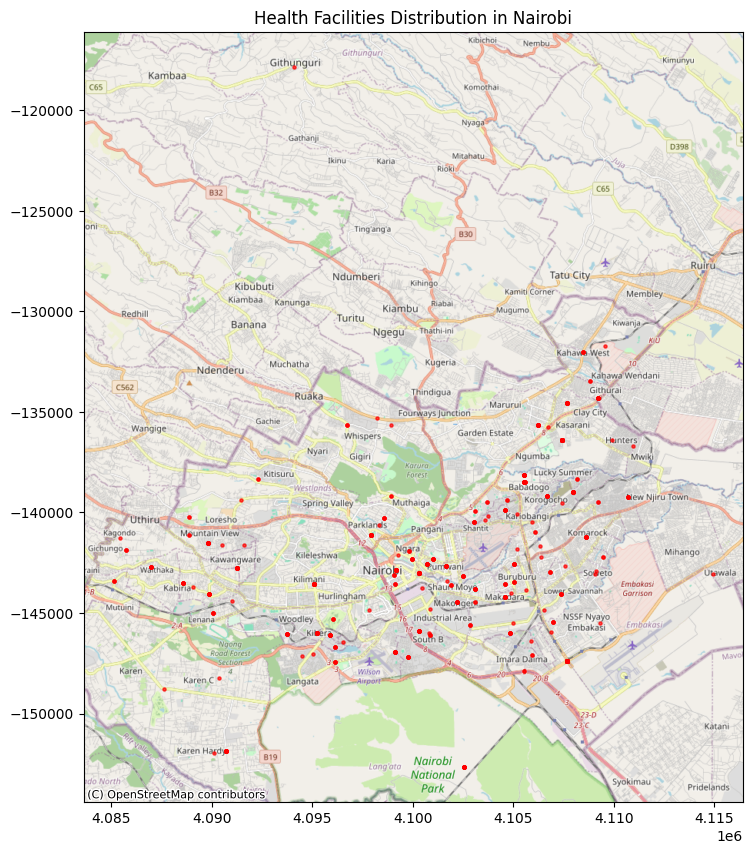

In [ ]:
filtered_gdf = filtered_gdf.to_crs(epsg=3857)

# Plot the facilities
ax = filtered_gdf.plot(marker='o', color='red', markersize=5, figsize=(10, 10), alpha=0.7)

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Set the title and labels
ax.set_title('Health Facilities Distribution in Nairobi')


# Show the plot
plt.show()

### Density Per Sub County

In [ ]:
# Group by 'Sub County' to get the number of facilities in each sub-county
facility_counts = merged_df.groupby('Sub County').size().reset_index(name='Facility Count')



# Merge facility counts with sub-county area data
facility_density_df = pd.merge(facility_counts, merged_df, on='Sub County')

# Calculate the facility density
facility_density_df['Facility Density'] = facility_density_df['Facility Count'] / facility_density_df['Land Area (Sq. Km)']


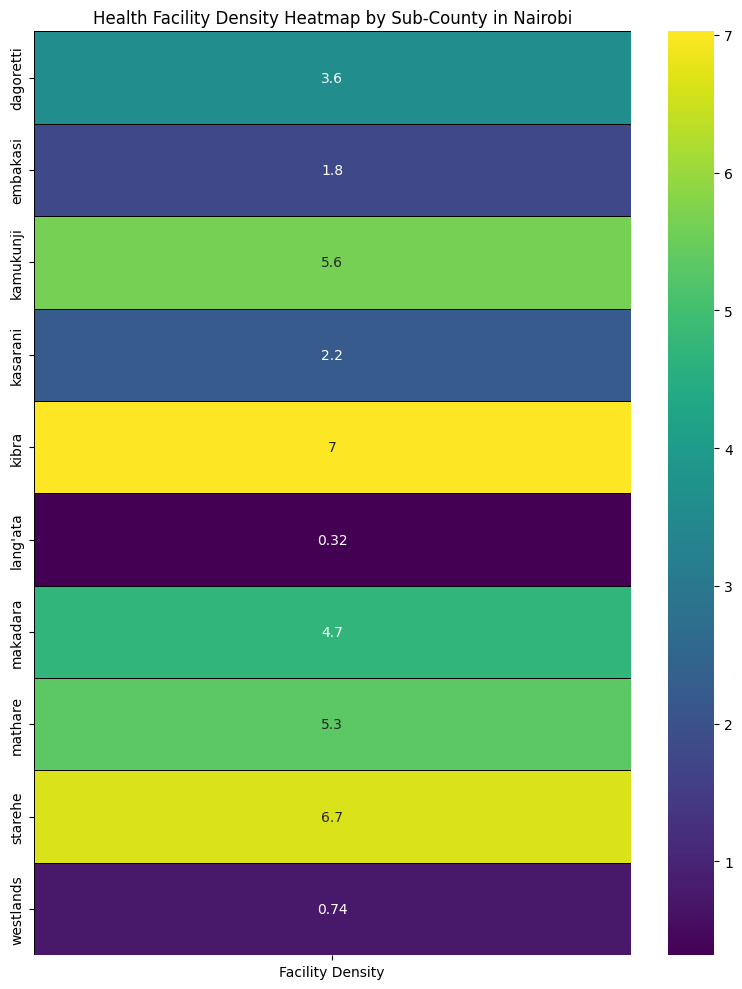

In [ ]:
heatmap_data = facility_density_df.pivot_table(index='Sub County', values='Facility Density')

# Plot the heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(heatmap_data, annot=True, cmap="viridis", linewidths=0.5, linecolor='black')

# Add title and labels
plt.title('Health Facility Density Heatmap by Sub-County in Nairobi')
plt.xlabel('')
plt.ylabel('')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Assuming 'facility_density_df' contains 'Sub County' and 'Facility Density'
# and 'population_density_df' contains 'Sub County' and 'Population Density'
comparison_df = pd.merge(facility_density_df, merged_df, on='Sub County')

# Display the merged DataFrame to ensure everything is correct
comparison_df.head()


,Sub County,Facility Count,Facility Code_x,Facility Name_x,District_x,Division_x,Type_x,Owner_x,Location_x,Sub Location_x,...,Open Weekends_y,Operational Status_y,ART_y,C-IMCI_y,FP_y,HBC_y,IPD_y,Population_y,Land Area (Sq. Km)_y,pop density_y
0,dagoretti,105,19958,Aar Gwh Health Care Ltd,Dagoretti North,Kilimani,Health Centre,Private Enterprise (Institution),NaN,NaN,...,Y,Operational,NaN,NaN,NaN,NaN,NaN,434208,29.1,14908
1,dagoretti,105,19958,Aar Gwh Health Care Ltd,Dagoretti North,Kilimani,Health Centre,Private Enterprise (Institution),NaN,NaN,...,Y,Operational,NaN,NaN,NaN,NaN,NaN,434208,29.1,14908
2,dagoretti,105,19958,Aar Gwh Health Care Ltd,Dagoretti North,Kilimani,Health Centre,Private Enterprise (Institution),NaN,NaN,...,N,Operational,NaN,NaN,NaN,Y,NaN,434208,29.1,14908
3,dagoretti,105,19958,Aar Gwh Health Care Ltd,Dagoretti North,Kilimani,Health Centre,Private Enterprise (Institution),NaN,NaN,...,Y,Operational,Y,Y,Y,Y,Y,434208,29.1,14908
4,dagoretti,105,19958,Aar Gwh Health Care Ltd,Dagoretti North,Kilimani,Health Centre,Private Enterprise (Institution),NaN,NaN,...,N,Operational,NaN,NaN,Y,NaN,Y,434208,29.1,14908


In [ ]:
# Drop duplicates based on relevant columns
df_cleaned = comparison_df.drop_duplicates(subset=['Sub County', 'Facility Code_x'])

# Group by 'Sub County' to aggregate the facility count
facility_count_df = df_cleaned.groupby('Sub County').agg({
    'Facility Code_x': 'count',
    'pop density_y': 'first'  # Assuming population density is the same across duplicates
}).reset_index()

# Rename columns for clarity
facility_count_df.rename(columns={'Facility Code_x': 'Facility Count', 'pop density_y': 'Population Density'}, inplace=True)

# Display the cleaned DataFrame
# Convert 'Sub County' names to title case
facility_count_df['Sub County'] = facility_count_df['Sub County'].str.title()


facility_count_df



,Sub County,Facility Count,Population Density
0,Dagoretti,105,14908
1,Embakasi,152,11460
2,Kamukunji,59,25455
3,Kasarani,192,9058
4,Kibra,85,15311
5,Lang'Ata,69,911
6,Makadara,55,16150
7,Mathare,16,68941
8,Starehe,137,10205
9,Westlands,72,3167


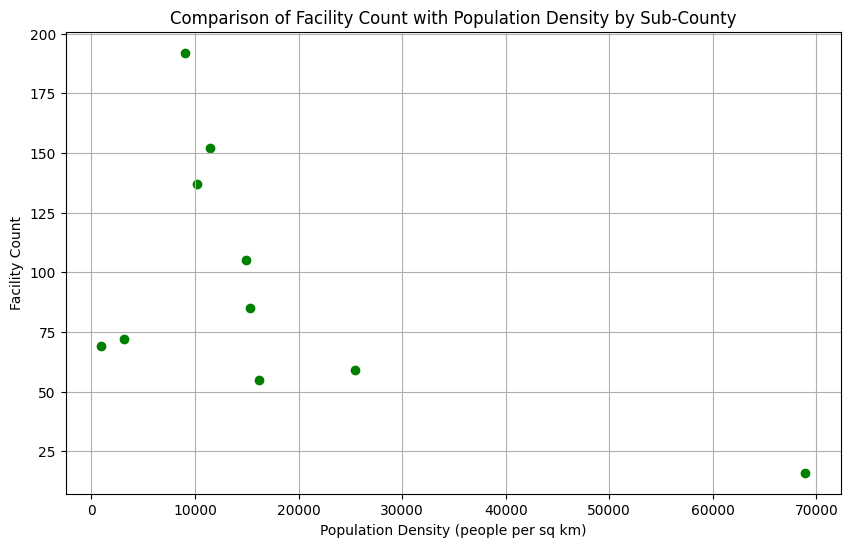

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(facility_count_df['Population Density'], facility_count_df['Facility Count'], color='green')

# Add labels and title
plt.title('Comparison of Facility Count with Population Density by Sub-County')
plt.xlabel('Population Density (people per sq km)')
plt.ylabel('Facility Count')

# Add a grid and show the plot
plt.grid(True)
plt.show()

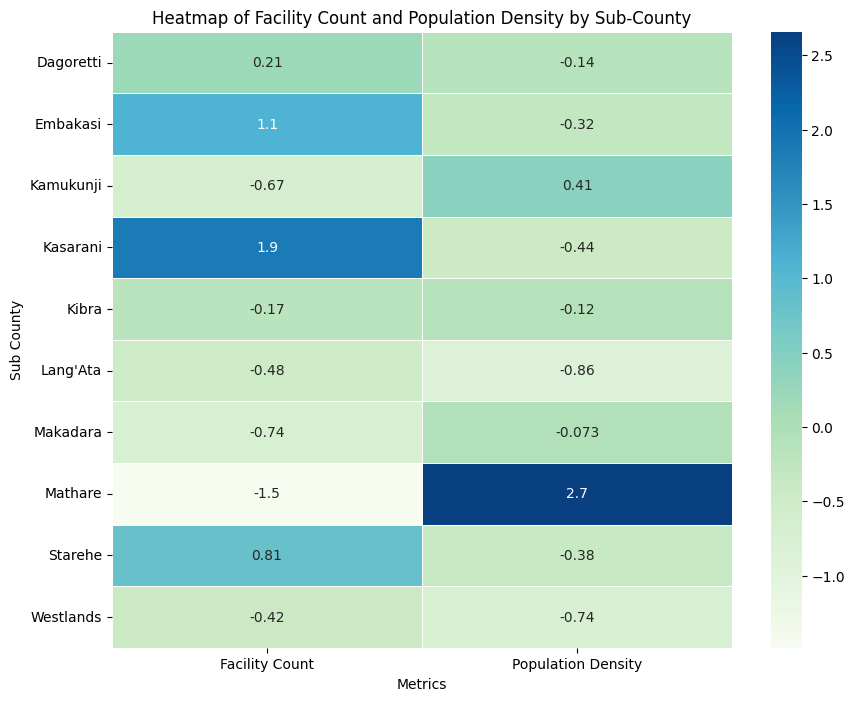

In [ ]:
heatmap_data = facility_count_df.pivot_table(index='Sub County', values=['Facility Count', 'Population Density'])

# Normalize the data (optional) to make the heatmap more interpretabl
heatmap_data_normalized = (heatmap_data - heatmap_data.mean()) / heatmap_data.std()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_normalized, annot=True, cmap='GnBu', linewidths=0.5)

# Set titles and labels
plt.title('Heatmap of Facility Count and Population Density by Sub-County')
plt.xlabel('Metrics')
plt.ylabel('Sub County')

plt.show()

Mathare is a significant outlier with a very high population density but a low number of facilities, indicating a critical need for more health infrastructure.
Kasarani has more health facilities compared to its population size, suggesting that it might be better equipped than other sub-counties.
Embakasi and Starehe seem relatively balanced in terms of their facility distribution and population density.

In [ ]:
df_mapped.head()

,Facility Code,Facility Name,District,Division,Type,Owner,Location,Sub Location,Description of Location,Constituency,...,FP,IPD,Sub County,County,Full Address,Latitude,Longitude,Population,Land Area (Sq. Km),pop density
0,19310,St Jude'S Huruma Community Health Services,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,Situated Near Ndururumo Primary School (Juja R...,Mathare,...,NaN,NaN,Mathare,Mathare,19310 Mathare Huruma Huruma Huruma Mathare Ma...,-1.256490,36.872114,206564,3.0,68941
1,13043,7Kr Mrs Health Centre,Langata,Lang'Ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,"Next To Nairobi Opharnage,Off Lang'Ata Rd.",Lang'Ata,...,Y,Y,Lang'Ata,Lang'Ata,13043 Langata Lang'Ata Mugumoini Mugumoini Lan...,-1.371275,36.853860,197489,216.8,911
2,20346,Aar Adams Health Centre,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,Woodly,Greenhouse Adams 1St Floor,Kibra,...,NaN,NaN,Kibra,Kibra,20346 Kibra Woodly Woodly Woodly Kibra 00100 K...,-1.311484,36.787948,185777,12.1,15311
3,12861,Aar City Centre Clinic,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,NaN,Stiuated At Icea Building Along Kenyatta Avenu...,Starehe,...,Y,Y,Starehe,Starehe,12861 Starehe Starehe Central Business Distric...,-1.283353,36.823537,210423,20.6,10205
4,16796,Aar Clinic Sarit Centre (Westlands),Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,Upper Parklands,In Sarit Centre Westlands,Westlands,...,NaN,NaN,Westlands,Westlands,16796 Westlands Parklands Parklands Upper Park...,-1.267500,36.812022,308854,97.5,3167


In [ ]:
# Merging df_mapped with facility_count_df to include Facility Count
df_mapped = df_mapped.merge(facility_count_df[['Sub County', 'Facility Count']], on='Sub County', how='left')

df_mapped.head()


,Facility Code,Facility Name,District,Division,Type,Owner,Location,Sub Location,Description of Location,Constituency,...,IPD,Sub County,County,Full Address,Latitude,Longitude,Population,Land Area (Sq. Km),pop density,Facility Count
0,19310,St Jude'S Huruma Community Health Services,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,Situated Near Ndururumo Primary School (Juja R...,Mathare,...,NaN,Mathare,Mathare,19310 Mathare Huruma Huruma Huruma Mathare Ma...,-1.256490,36.872114,206564,3.0,68941,16
1,13043,7Kr Mrs Health Centre,Langata,Lang'Ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,"Next To Nairobi Opharnage,Off Lang'Ata Rd.",Lang'Ata,...,Y,Lang'Ata,Lang'Ata,13043 Langata Lang'Ata Mugumoini Mugumoini Lan...,-1.371275,36.853860,197489,216.8,911,69
2,20346,Aar Adams Health Centre,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,Woodly,Greenhouse Adams 1St Floor,Kibra,...,NaN,Kibra,Kibra,20346 Kibra Woodly Woodly Woodly Kibra 00100 K...,-1.311484,36.787948,185777,12.1,15311,85
3,12861,Aar City Centre Clinic,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,NaN,Stiuated At Icea Building Along Kenyatta Avenu...,Starehe,...,Y,Starehe,Starehe,12861 Starehe Starehe Central Business Distric...,-1.283353,36.823537,210423,20.6,10205,137
4,16796,Aar Clinic Sarit Centre (Westlands),Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,Upper Parklands,In Sarit Centre Westlands,Westlands,...,NaN,Westlands,Westlands,16796 Westlands Parklands Parklands Upper Park...,-1.267500,36.812022,308854,97.5,3167,72


In [ ]:
import folium
from folium.plugins import HeatMap


# Initialize the map centered around a specific location
df_mapped_cleaned = df_mapped.dropna(subset=['Latitude', 'Longitude', 'Facility Count'])

# Initialize the map centered around a specific location (Nairobi)
my_map = folium.Map(location=[-1.286389, 36.817223], zoom_start=12)

# Prepare the data for the heatmap using the cleaned DataFrame
heat_data = [[row['Latitude'], row['Longitude'], row['Facility Count']] for index, row in df_mapped_cleaned.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data).add_to(my_map)

my_map

 The most intense red areas, particularly around the central and eastern parts of Nairobi, indicate a high concentration of health facilities. This suggests that these regions are well-served by health facilities.